In [1]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import pickle
from utility import *
%load_ext autoreload
%autoreload 2

In [2]:
df1 = pd.read_csv('data/test_transaction.csv')
df2 = pd.read_csv('data/test_identity.csv')

In [3]:
def getEmailService(x):
    if type(x) != str:
        return ''
    xSplit = x.split('.', maxsplit=1)
    return xSplit[0].replace('ymail', 'yahoo')
def getEmailDomain(x):
    if type(x) != str:
        return ''
    xSplit = x.split('.', maxsplit=1)
    if len(xSplit) > 1:
        return xSplit[1]
    return ''
def mergeTransactionAndIdentity(df1, df2):
    df1.index = df1['TransactionID']
    df2.index = df2['TransactionID']
    del df1['TransactionID']
    del df2['TransactionID']
    df = df1.join(df2)
    return df

def cleanEmails(df):
    dfEmails = df[['P_emaildomain', 'R_emaildomain']]
    df['P_emailservice'] = dfEmails['P_emaildomain'].map(getEmailService)
    df['P_emaildomain']  = dfEmails['P_emaildomain'].map(getEmailDomain)
    df['R_emailservice'] = dfEmails['R_emaildomain'].map(getEmailService)
    df['R_emaildomain']  = dfEmails['R_emaildomain'].map(getEmailDomain)      
    
Params = collections.namedtuple('Params', 
                                """lowPercentColumns midPercentColumns midAndLowPercentColumns 
                                highPercentColumns categoricalColumns categoricalOptions""")

def cleanTrainingData(df):
    categoricalColumns = df.columns[df.dtypes==object]
    numericColumns = df.columns[df.dtypes!=object]   
    
    percentNa = df[numericColumns].isna().sum()/ len(df)
    ####
    lowPercentColumns = numericColumns[(percentNa < .3) & (percentNa > 0)]
    ###
    midPercentColumns = numericColumns[(percentNa >= .3) & (percentNa < .7)]
    ###
    midAndLowPercentColumns = numericColumns[percentNa < .7]   
    highPercentColumns = numericColumns[percentNa >= .7]   
    #for column in lowPercentColumns:
    #    df[column] = df[column].fillna(df[column].mean())
    #for column in midPercentColumns:
    #    df["%s_isnan"%column] = df[column].isna()
    #    df[column] = df[column].fillna(df[column].mean())
    ###
    categoricalColumns= categoricalColumns
    #categoricalColumnsExceptEmail.remove('P_emaildomain')
    #categoricalColumnsExceptEmail.remove('R_emaildomain')
    ###
    categoricalOptions = {column: categoricalWithTooManyOptions(df, column) for column in categoricalColumns}
    #for column in categoricalColumnsExceptEmail:
    #    df[column] = cleanedCategoricalWithTooManyOptions(df, column, highlyOccuring=categoricalOptions[column])
    #dfCategoricalExceptEmailDummied = pd.get_dummies(df[categoricalColumnsExceptEmail])
    #print(dfCategoricalExceptEmailDummied.columns)

    #emailColumns = ['P_emailservice', 'P_emaildomain', 'R_emailservice', 'R_emaildomain'] 
    ###
    #emailOptions = {column: categoricalWithTooManyOptions(df, column) for column in emailColumns}
    #for column in emailColumns:
    #    df[column] = cleanedCategoricalWithTooManyOptions(df, column, highlyOccuring=emailOptions[column])
    #dfEmailDummied = pd.get_dummies(df[emailColumns])
    params = Params(lowPercentColumns, 
           midPercentColumns,
           midAndLowPercentColumns,
           highPercentColumns,
           categoricalColumns,
           categoricalOptions
    )
    return params

In [4]:
df = mergeTransactionAndIdentity(df1, df2)

In [5]:
cleanEmails(df)

In [6]:
#del df1
#del df2

In [7]:
#params = cleanTrainingData(df)

In [8]:
with open('./params', 'rb') as f:
    params = pickle.load(f)
    #pickle.dump(params, f)

In [9]:
#tmp = df.drop(params['highPercentColumns'])
#tmp.columns[tmp.isna().sum() > 0]
df.drop(params.highPercentColumns, inplace=True, axis=1)

In [10]:
len(df.columns)

244

(array([181.,  21.,   0.,  16.,   7.,   1.,   1.,  12.,   3.,   2.]),
 array([0.        , 0.09900097, 0.19800194, 0.29700291, 0.39600388,
        0.49500485, 0.59400581, 0.69300678, 0.79200775, 0.89100872,
        0.99000969]),
 <a list of 10 Patch objects>)

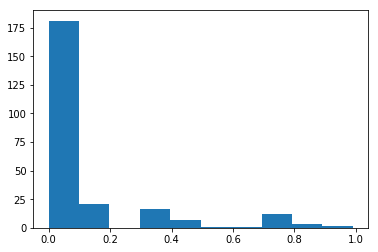

In [11]:
percentNa = df.isna().sum()/ len(df)
plt.hist(percentNa)

In [12]:
cleanNumericColumn(df, params.lowPercentColumns, createFlag=False)
cleanNumericColumn(df, params.midPercentColumns, createFlag=True)

(array([234.,   0.,   0.,   4.,   4.,   0.,   1.,  12.,   3.,   2.]),
 array([0.        , 0.09900097, 0.19800194, 0.29700291, 0.39600388,
        0.49500485, 0.59400581, 0.69300678, 0.79200775, 0.89100872,
        0.99000969]),
 <a list of 10 Patch objects>)

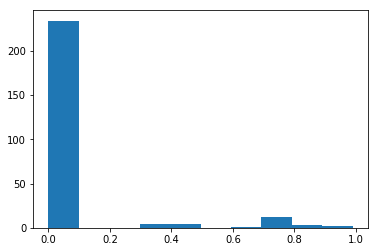

In [13]:
#df.drop(params.highPercentColumns
percentNa = df.isna().sum()/ len(df)
plt.hist(percentNa)

In [14]:
for column, highlyOccuring in params.categoricalOptions.items():
    for item in highlyOccuring:
        if pd.isna(item):
            highlyOccuring.remove(item)
            highlyOccuring.add('nan')
    df[column] = pd.Categorical(df[column], categories=list(highlyOccuring))
    #cleanOptions(df, column, highlyOccuring)

(array([234.,   0.,   0.,   4.,   4.,   0.,   1.,  10.,   2.,   5.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

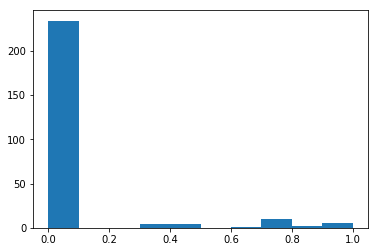

In [15]:
#df.drop(params.highPercentColumns
percentNa = df.isna().sum()/ len(df)
plt.hist(percentNa)

In [16]:
#tmp = df[params.]
#a = set(params.midAndLowPercentColumns)
#a.remove('isFraud')
#tmp = df.[list(a)]
#cleanNumericColumn(df, tmp.columns[tmp.isna().sum() > 0], createFlag=False) 

In [17]:
##tmp = df[params.]
##a.remove('isFraud')
#tmp = df[params.categoricalColumns]
#for column in tmp.columns[tmp.isna().sum() > 0]:

In [19]:
#df_new = pd.get_dummies(df, columns=params.categoricalColumns)
#for key, value in params.categoricalOptions.items():
df_new = pd.get_dummies(df, columns=params.categoricalColumns, dummy_na=True)

(array([372.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.00093706, 0.00187412, 0.00281118, 0.00374824,
        0.0046853 , 0.00562236, 0.00655942, 0.00749648, 0.00843354,
        0.0093706 ]),
 <a list of 10 Patch objects>)

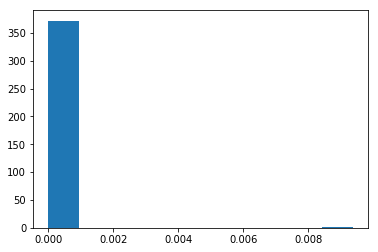

In [20]:
#df.drop(params.highPercentColumns
percentNa = df_new.isna().sum()/ len(df_new)
plt.hist(percentNa)

In [41]:
cleanNumericColumn(df_new, df_new.columns[df_new.isna().sum()>0], createFlag=False)

(array([  0.,   0.,   0.,   0.,   0., 373.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

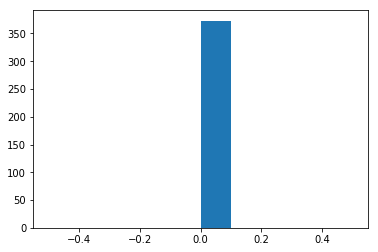

In [42]:
#df.drop(params.highPercentColumns
percentNa = df_new.isna().sum()/ len(df_new)
plt.hist(percentNa)

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14'],
      dtype='object')

In [43]:
#df_train = pd.read_pickle('data/dataframe_v03.pd')
#pd.to_pickle(df_new, 'data/dataframe_test_v03.pd')

In [34]:
traincols = set(df_train.columns)

In [35]:
testcols = set(df_new.columns)

In [36]:
print(traincols - testcols)
print(testcols - traincols)

{'isFraud'}
set()


In [44]:
df_new.shape

(506691, 373)

In [37]:
df[]

Index(['TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5',
       'addr1', 'addr2', 'dist1', 'C1',
       ...
       'P_emailservice_comcast', 'P_emailservice_icloud',
       'P_emailservice_anonymous', 'P_emailservice_nan', 'R_emailservice_',
       'R_emailservice_gmail', 'R_emailservice_hotmail',
       'R_emailservice_yahoo', 'R_emailservice_anonymous',
       'R_emailservice_nan'],
      dtype='object', length=373)

In [50]:
df_train.columns[df_train.dtypes == str]

Index([], dtype='object')

In [52]:
collections.Counter(df_train.dtypes)

Counter({dtype('int64'): 3,
         dtype('float64'): 209,
         dtype('bool'): 16,
         dtype('uint8'): 146})